In [2]:
from gibbs.dataclass import GibbsResult
import matplotlib.pyplot as plt
import numpy as np
from gibbs.learning.klocal_pauli_basis import KLocalPauliBasis
from gibbs.utils import classical_learn_hamiltonian
from gibbs.plots.plots import preparation, preparation_error,preparation_vsclassic,compare_preparations
from gibbs.preparation.varqite import efficientTwoLocalansatz
from qiskit import transpile
from qiskit.circuit.library import ECRGate
%load_ext autoreload
%autoreload 2
import os
gibbs_result_list = []
folder_path = "../saved_simulations/turbo/testingansatz"
for file in os.listdir(folder_path):
    if file.endswith(".npy"):
        path = os.path.join(folder_path, file)
        gibbs_result_list.append(GibbsResult.load(path))
# gibbs_result_list = gibbs_result_list[::-1]
print(gibbs_result_list)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from qiskit.quantum_info import Statevector
from gibbs.utils import printarray,state_from_ansatz
printarray(state_from_ansatz(gibbs_result_list[0].ansatz,gibbs_result_list[0].parameters[0]))

[[ 0.25 -0.25  0.    0.    0.   -0.   -0.   -0.    0.   -0.    0.    0.
   0.   -0.    0.    0.  ]
 [-0.25  0.25 -0.   -0.   -0.    0.    0.    0.   -0.    0.   -0.   -0.
  -0.    0.   -0.   -0.  ]
 [ 0.   -0.    0.    0.   -0.    0.   -0.   -0.   -0.    0.   -0.   -0.
   0.   -0.    0.    0.  ]
 [ 0.   -0.    0.    0.   -0.    0.   -0.   -0.   -0.    0.   -0.   -0.
   0.   -0.    0.    0.  ]
 [ 0.   -0.   -0.   -0.    0.   -0.    0.    0.    0.   -0.   -0.   -0.
   0.   -0.   -0.   -0.  ]
 [-0.    0.    0.    0.   -0.    0.   -0.   -0.   -0.    0.    0.    0.
  -0.    0.    0.    0.  ]
 [-0.    0.   -0.   -0.    0.   -0.    0.    0.   -0.    0.    0.    0.
   0.   -0.   -0.   -0.  ]
 [-0.    0.   -0.   -0.    0.   -0.    0.    0.   -0.    0.    0.    0.
   0.   -0.   -0.   -0.  ]
 [ 0.   -0.   -0.   -0.    0.   -0.   -0.   -0.    0.   -0.    0.    0.
   0.   -0.    0.    0.  ]
 [-0.    0.    0.    0.   -0.    0.    0.    0.   -0.    0.   -0.   -0.
  -0.    0.   -0.   -0.  ]
 [ 0.   -0

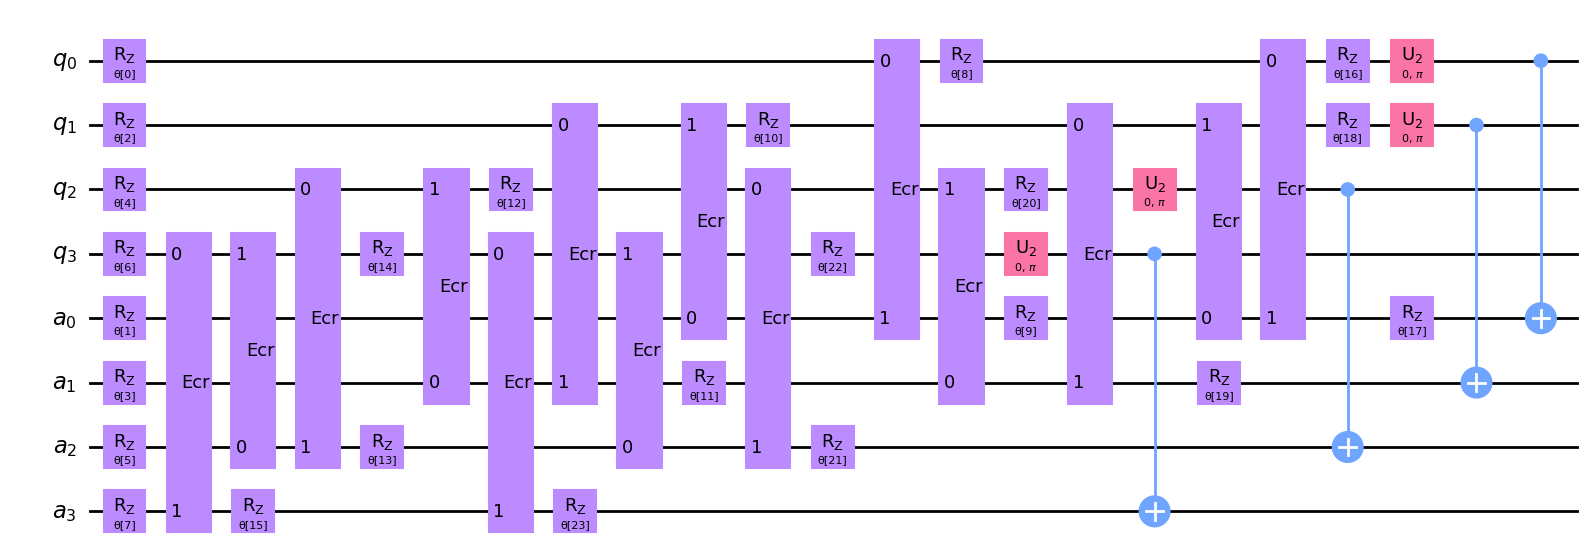

In [21]:
ansatz_arguments = {"num_qubits":4,"depth":2,"entanglement":"reverse_linear","su2_gates":["rz"],"ent_gates":[ECRGate()]}
ansatz,x0 = efficientTwoLocalansatz(**ansatz_arguments)
# ansatz = transpile(ansatz,basis_gates=["rx", "ry", "rz", "cp", "crx", "cry", "crz"])
display(ansatz.decompose().draw(output="mpl"))